# Stock Market Prediction using Numerical and Textual Analysis.
## Stacked LSTM Model
## TSF task 2

## Sammed Kamate

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [60]:
data = pd.read_csv('BSESN.csv',index_col='Date', parse_dates=True)

In [61]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-03-15,5745.060059,5764.200195,5505.979980,5520.660156,5520.660156,38400.0
2004-03-16,5471.169922,5551.919922,5434.970215,5525.089844,5525.089844,40800.0
2004-03-17,5545.830078,5560.149902,5482.629883,5535.689941,5535.689941,33400.0
2004-03-18,5539.720215,5540.680176,5399.049805,5414.939941,5414.939941,36000.0
2004-03-19,5410.479980,5496.680176,5386.620117,5443.439941,5443.439941,30600.0


In [62]:
data.isnull().sum()

Open         38
High         38
Low          38
Close        38
Adj Close    38
Volume       38
dtype: int64

In [63]:
data.dropna(inplace = True, how ='all')

In [64]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4175 entries, 2004-03-15 to 2021-03-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4175 non-null   float64
 1   High       4175 non-null   float64
 2   Low        4175 non-null   float64
 3   Close      4175 non-null   float64
 4   Adj Close  4175 non-null   float64
 5   Volume     4175 non-null   float64
dtypes: float64(6)
memory usage: 228.3 KB


Text(0, 0.5, 'Price')

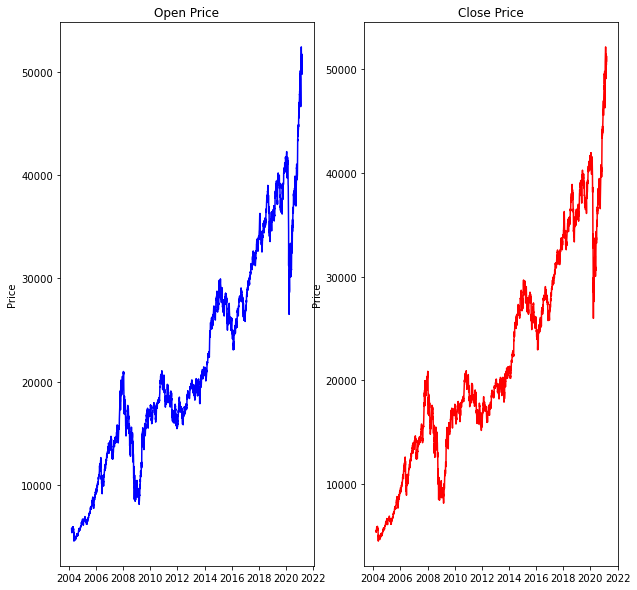

In [66]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(data['Open'], 'b')
plt.title('Open Price')
plt.ylabel('Price')

plt.subplot(1,2,2)
plt.plot(data['Close'], 'r')
plt.title('Close Price')
plt.ylabel('Price')


## 200 EMA and 200 SMA

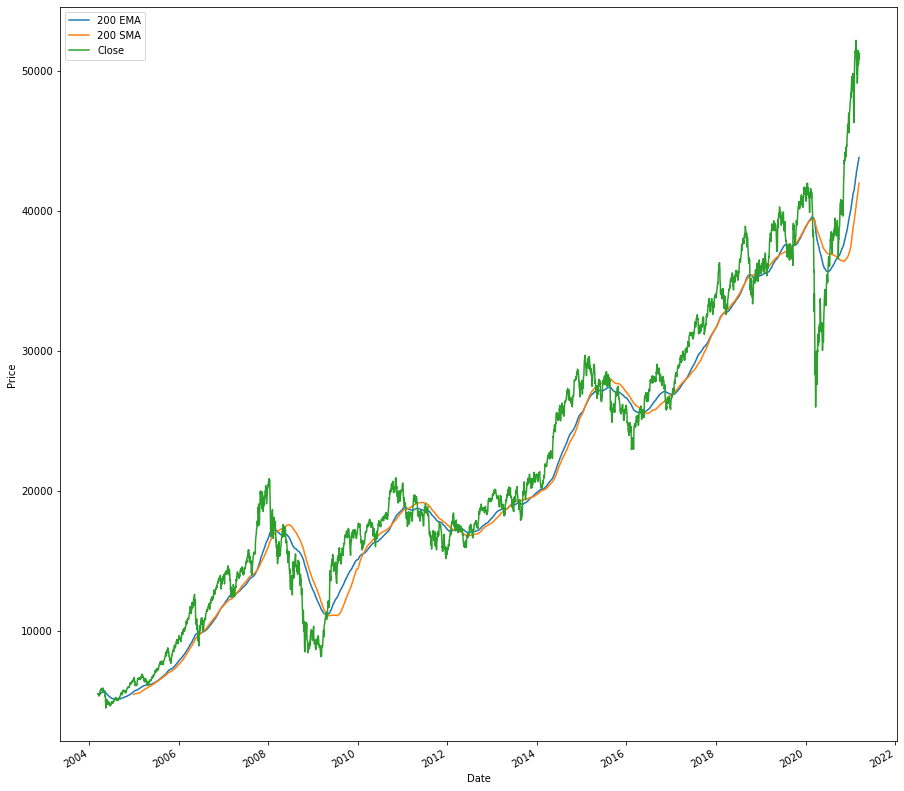

In [10]:
data.ewm(span=200).mean()['Close'].plot(figsize=(15,15), label ='200 EMA' )
data.rolling(window=200).mean()['Close'].plot(figsize=(15,15), label ='200 SMA')
data['Close'].plot(label ='Close')
plt.legend()
plt.ylabel('Price')
plt.show()

In [11]:
training_orig = data.loc[:, ['Close']]
training_orig

,Close
Date,
2004-03-15,5520.660156
2004-03-16,5525.089844
2004-03-17,5535.689941
2004-03-18,5414.939941
2004-03-19,5443.439941
...,...
2021-03-05,50405.320313
2021-03-08,50441.070313
2021-03-09,51025.480469


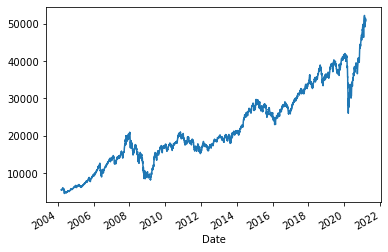

In [12]:
training_orig['Close'].plot()

In [13]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
training = sc.fit_transform(np.array(training_orig['Close']).reshape(-1,1))
print(training.shape)

(4175, 1)


In [14]:
train_size = int(len(training)*0.65)

train = training[0:train_size]
test = training[train_size:]

print(train.shape)
print(test.shape)

(2713, 1)
(1462, 1)


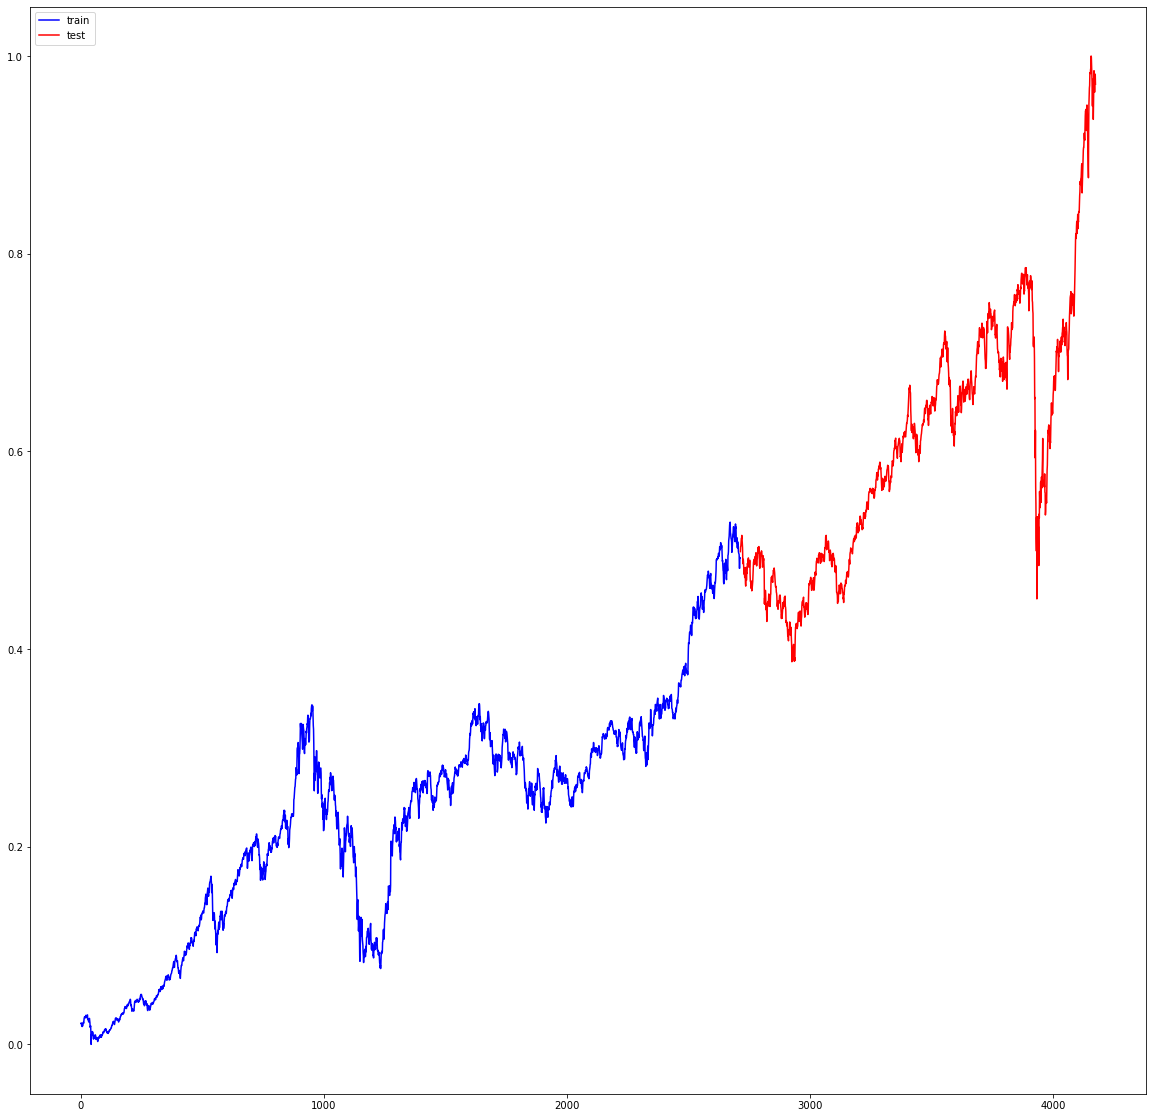

In [15]:
test_plot = np.empty_like(training)
test_plot[:, :] = np.nan
test_plot[len(train): , :] = test

plt.figure(figsize=(20,20))
plt.plot(train, 'blue', label='train')
plt.plot(test_plot, 'red', label='test')
plt.legend(loc='upper left')

In [16]:
def helper(dataset, timestep):
    x = []
    y = []
    for i in range(len(dataset)-timestep-1):
        x.append(dataset[i:(i+timestep), 0])
        y.append(dataset[i+timestep, 0])
    return np.array(x),np.array(y)
    

In [42]:
xtrain, ytrain = helper(train,100)
xtest, ytest = helper(test,100)

In [43]:
xtrain.shape, ytrain.shape

((2612, 100), (2612,))

In [44]:
xtest.shape, ytest.shape

((1361, 100), (1361,))

In [45]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)
xtest.shape

(1361, 100, 1)

In [46]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.3))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(50))
model.add(Dropout(0.3))

model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [47]:
model.fit(xtrain, ytrain, epochs=10, batch_size=32)

Epoch 1/10
2612/2612 [==============================] - 72s 28ms/step - loss: 0.0066
Epoch 2/10
2612/2612 [==============================] - 81s 31ms/step - loss: 0.0015
Epoch 3/10
2612/2612 [==============================] - 84s 32ms/step - loss: 0.0013
Epoch 4/10
2612/2612 [==============================] - 84s 32ms/step - loss: 0.0011
Epoch 5/10
2612/2612 [==============================] - 81s 31ms/step - loss: 9.6984e-04
Epoch 6/10
2612/2612 [==============================] - 83s 32ms/step - loss: 8.5814e-04
Epoch 7/10
2612/2612 [==============================] - 85s 33ms/step - loss: 8.4222e-04
Epoch 8/10
2612/2612 [==============================] - 84s 32ms/step - loss: 8.1033e-04
Epoch 9/10
2612/2612 [==============================] - 79s 30ms/step - loss: 7.4299e-04
Epoch 10/10
2612/2612 [==============================] - 83s 32ms/step - loss: 7.5571e-04


In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)               

In [49]:
train_predict = model.predict(xtrain)
test_predict = model.predict(xtest)

In [50]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytest, test_predict)

0.0009279127861811666

In [51]:
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)

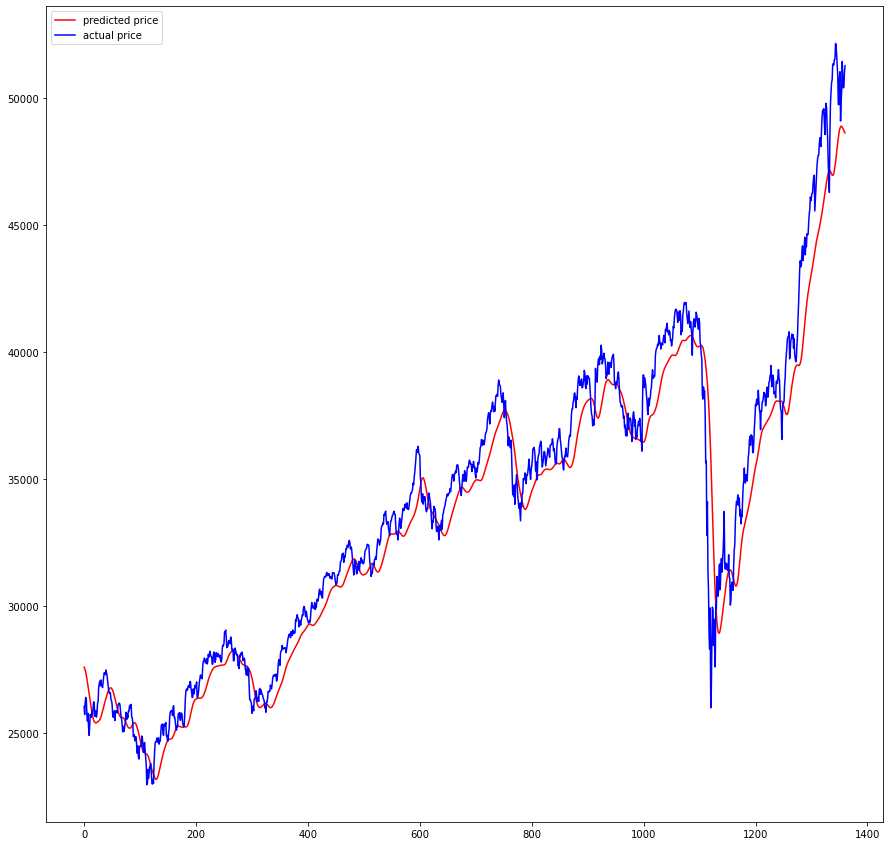

In [52]:
plt.figure(figsize=(15,15))
plt.plot(test_predict, color = 'red', label = 'predicted price')
plt.plot(sc.inverse_transform(ytest.reshape(-1,1)), color= 'blue', label='actual price')
plt.legend()
plt.show()

In [53]:
x_input = test[len(test)-100:, ].reshape(1,-1)

temp = list(x_input)
temp = temp[0].tolist()
len(temp)

100

In [54]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp)>100):
        x_input=np.array(temp[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp.extend(yhat[0].tolist())
        temp=temp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp.extend(yhat[0].tolist())
        print(len(temp))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9252886]
101
1 day input [0.75398151 0.75634818 0.75976772 0.75664446 0.75931003 0.74797715
 0.75588082 0.74329627 0.73967375 0.73682413 0.73983591 0.75040383
 0.7578544  0.77304926 0.78465284 0.79943534 0.81371096 0.82034329
 0.81538032 0.81718117 0.82787837 0.83264951 0.82047528 0.82639962
 0.83048992 0.83984733 0.82526322 0.8343219  0.83201294 0.84262645
 0.84184149 0.8421481  0.85152715 0.85881835 0.86262836 0.87301658
 0.87000243 0.87292239 0.87616378 0.87636759 0.88483134 0.88952984
 0.8910063  0.86148351 0.87098488 0.88016636 0.89127593 0.89925535
 0.90469782 0.90749201 0.90759924 0.91652856 0.92200571 0.91647101
 0.91477657 0.9292405  0.93945706 0.94465736 0.94413712 0.94606455
 0.93453254 0.92466029 0.9421637  0.95042898 0.94691664 0.93125581
 0.92011288 0.90043438 0.88919446 0.87684184 0.92542295 0.95054646
 0.96015908 0.96768367 0.97014626 0.98309807 0.98268481 0.98227164
 0.98693341 0.98720165 1.         0.99895156 0.99054962 0.98259275
 0.97346496 0.9494258  0.94957459 

8 day output [[0.9129813]]
9 day input [0.73967375 0.73682413 0.73983591 0.75040383 0.7578544  0.77304926
 0.78465284 0.79943534 0.81371096 0.82034329 0.81538032 0.81718117
 0.82787837 0.83264951 0.82047528 0.82639962 0.83048992 0.83984733
 0.82526322 0.8343219  0.83201294 0.84262645 0.84184149 0.8421481
 0.85152715 0.85881835 0.86262836 0.87301658 0.87000243 0.87292239
 0.87616378 0.87636759 0.88483134 0.88952984 0.8910063  0.86148351
 0.87098488 0.88016636 0.89127593 0.89925535 0.90469782 0.90749201
 0.90759924 0.91652856 0.92200571 0.91647101 0.91477657 0.9292405
 0.93945706 0.94465736 0.94413712 0.94606455 0.93453254 0.92466029
 0.9421637  0.95042898 0.94691664 0.93125581 0.92011288 0.90043438
 0.88919446 0.87684184 0.92542295 0.95054646 0.96015908 0.96768367
 0.97014626 0.98309807 0.98268481 0.98227164 0.98693341 0.98720165
 1.         0.99895156 0.99054962 0.98259275 0.97346496 0.9494258
 0.94957459 0.97119691 0.97660347 0.93590332 0.95164032 0.96102249
 0.98511027 0.97254818 0.9

16 day output [[0.88757104]]
17 day input [0.81371096 0.82034329 0.81538032 0.81718117 0.82787837 0.83264951
 0.82047528 0.82639962 0.83048992 0.83984733 0.82526322 0.8343219
 0.83201294 0.84262645 0.84184149 0.8421481  0.85152715 0.85881835
 0.86262836 0.87301658 0.87000243 0.87292239 0.87616378 0.87636759
 0.88483134 0.88952984 0.8910063  0.86148351 0.87098488 0.88016636
 0.89127593 0.89925535 0.90469782 0.90749201 0.90759924 0.91652856
 0.92200571 0.91647101 0.91477657 0.9292405  0.93945706 0.94465736
 0.94413712 0.94606455 0.93453254 0.92466029 0.9421637  0.95042898
 0.94691664 0.93125581 0.92011288 0.90043438 0.88919446 0.87684184
 0.92542295 0.95054646 0.96015908 0.96768367 0.97014626 0.98309807
 0.98268481 0.98227164 0.98693341 0.98720165 1.         0.99895156
 0.99054962 0.98259275 0.97346496 0.9494258  0.94957459 0.97119691
 0.97660347 0.93590332 0.95164032 0.96102249 0.98511027 0.97254818
 0.96329808 0.96404836 0.97631327 0.98164457 0.97141489 0.92528862
 0.92502725 0.9245709

24 day output [[0.8651459]]
25 day input [0.83048992 0.83984733 0.82526322 0.8343219  0.83201294 0.84262645
 0.84184149 0.8421481  0.85152715 0.85881835 0.86262836 0.87301658
 0.87000243 0.87292239 0.87616378 0.87636759 0.88483134 0.88952984
 0.8910063  0.86148351 0.87098488 0.88016636 0.89127593 0.89925535
 0.90469782 0.90749201 0.90759924 0.91652856 0.92200571 0.91647101
 0.91477657 0.9292405  0.93945706 0.94465736 0.94413712 0.94606455
 0.93453254 0.92466029 0.9421637  0.95042898 0.94691664 0.93125581
 0.92011288 0.90043438 0.88919446 0.87684184 0.92542295 0.95054646
 0.96015908 0.96768367 0.97014626 0.98309807 0.98268481 0.98227164
 0.98693341 0.98720165 1.         0.99895156 0.99054962 0.98259275
 0.97346496 0.9494258  0.94957459 0.97119691 0.97660347 0.93590332
 0.95164032 0.96102249 0.98511027 0.97254818 0.96329808 0.96404836
 0.97631327 0.98164457 0.97141489 0.92528862 0.92502725 0.92457098
 0.92374682 0.92245984 0.92068857 0.91846836 0.91586995 0.91298127
 0.90989149 0.9066813

In [55]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

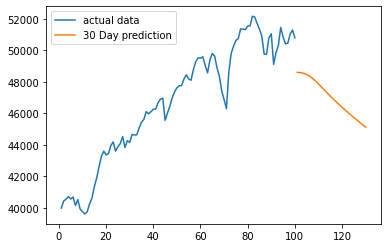

In [56]:
plt.plot(day_new,sc.inverse_transform(training[len(training)-100:]), label='actual data')
plt.plot(day_pred,sc.inverse_transform(lst_output), label='30 Day prediction')
plt.legend()

## Sentiment Analysis

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import seaborn as sns

In [24]:
news = pd.read_csv('india-news-headlines1.csv')
news.head()

,publish_date,headline_category,headline_text
0,20040315,india,Cong denies hand in SMSs on cricket
1,20040315,india,Four Pak militants shot dead in Valley
2,20040315,city.hyderabad,Exams rescheduled due to polls
3,20040315,city.hyderabad,Two knocked down by RTC bus
4,20040315,city.hyderabad,Escaped convict surrenders


In [25]:
news.drop(['headline_category'], inplace=True, axis=1)

In [26]:
news['publish_date'] = pd.to_datetime(news['publish_date'], format='%Y%m%d')
news['headline_text'] = news['headline_text'].str.lower()
news.columns = ['Date', 'headline']
news.head()

,Date,headline
0,2004-03-15,cong denies hand in smss on cricket
1,2004-03-15,four pak militants shot dead in valley
2,2004-03-15,exams rescheduled due to polls
3,2004-03-15,two knocked down by rtc bus
4,2004-03-15,escaped convict surrenders


In [27]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762632 entries, 0 to 762631
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      762632 non-null  datetime64[ns]
 1   headline  762632 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 11.6+ MB


In [29]:
news['headline'] = news.groupby(news['Date']).transform(lambda x: ' '.join(x))
news = news.drop_duplicates()
news.reset_index(inplace=True, drop=True)
news

,Date,headline
0,2004-03-15,cong denies hand in smss on cricket four pak m...
1,2004-03-16,other mba centres charge more fee than iim-a c...
2,2004-03-17,bjp; jd(u) agree on bihar seats another angry ...
3,2004-03-18,judicial custody for telgi aides govt reluctan...
4,2004-03-19,time to woo the 'hindi bhashi' in gujarat devg...
...,...,...
2501,2011-01-19,my ex doesn't want me: pratik saali is not a g...
2502,2011-01-20,neetu chandra denies going panty-less! aishwar...
2503,2011-01-21,giving the kids a dressing up ak hangal's ill ...
2504,2011-01-22,dte seeks report from tech institutes corporat...


In [30]:
news.shape

(2506, 2)

In [31]:
news.isnull().sum()

Date        0
headline    0
dtype: int64

### Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]. A value closer to 0 indicates factual information

In [32]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

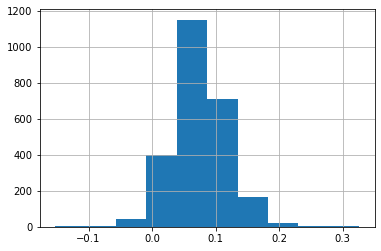

In [33]:
news['subjectivity'] = news['headline'].apply(getSubjectivity)
news['polarity'] = news['headline'].apply(getPolarity)

news['polarity'].hist()

In [48]:
analyser = SentimentIntensityAnalyzer()
cmp=[]
neg=[]
neu=[]
pos=[]

for i in news['headline']:
    score = analyser.polarity_scores(i)
    cmp.append(score['compound'])
    neg.append(score['neg'])
    neu.append(score['neu'])
    pos.append(score['pos'])

news['compound'] = np.array(cmp)
news['negative'] = np.array(neg)
news['neutral'] = np.array(neu)
news['positive'] = np.array(pos)
news

,Date,headline,subjectivity,polarity,compound,negative,neutral,positive
0,2004-03-15,cong denies hand in smss on cricket four pak m...,0.390376,0.056276,-0.9961,0.157,0.754,0.090
1,2004-03-16,other mba centres charge more fee than iim-a c...,0.403484,0.058216,-0.9989,0.176,0.741,0.083
2,2004-03-17,bjp; jd(u) agree on bihar seats another angry ...,0.372290,0.010945,-0.9963,0.165,0.720,0.114
3,2004-03-18,judicial custody for telgi aides govt reluctan...,0.533908,0.075538,-0.9986,0.153,0.771,0.077
4,2004-03-19,time to woo the 'hindi bhashi' in gujarat devg...,0.468463,0.041693,-0.9788,0.113,0.811,0.076
...,...,...,...,...,...,...,...,...
2501,2011-01-19,my ex doesn't want me: pratik saali is not a g...,0.367029,0.069033,-0.9998,0.138,0.775,0.087
2502,2011-01-20,neetu chandra denies going panty-less! aishwar...,0.365104,0.039488,-0.9999,0.163,0.742,0.095
2503,2011-01-21,giving the kids a dressing up ak hangal's ill ...,0.404739,0.030680,-0.9999,0.165,0.742,0.093
2504,2011-01-22,dte seeks report from tech institutes corporat...,0.416216,0.064674,-0.9998,0.154,0.741,0.105


In [49]:
df_merge = pd.merge(training_orig['Close'], news, on='Date')
df_merge

,Date,Close,headline,subjectivity,polarity,compound,negative,neutral,positive
0,2004-03-15,5520.660156,cong denies hand in smss on cricket four pak m...,0.390376,0.056276,-0.9961,0.157,0.754,0.090
1,2004-03-16,5525.089844,other mba centres charge more fee than iim-a c...,0.403484,0.058216,-0.9989,0.176,0.741,0.083
2,2004-03-17,5535.689941,bjp; jd(u) agree on bihar seats another angry ...,0.372290,0.010945,-0.9963,0.165,0.720,0.114
3,2004-03-18,5414.939941,judicial custody for telgi aides govt reluctan...,0.533908,0.075538,-0.9986,0.153,0.771,0.077
4,2004-03-19,5443.439941,time to woo the 'hindi bhashi' in gujarat devg...,0.468463,0.041693,-0.9788,0.113,0.811,0.076
...,...,...,...,...,...,...,...,...,...
1686,2011-01-17,18882.250000,older brother in the dark about sibling's deat...,0.387785,0.052752,-0.9998,0.167,0.715,0.118
1687,2011-01-18,19092.050781,top sex mistakes men make no alcohol for 6-pac...,0.351738,0.050378,-0.9998,0.138,0.783,0.079
1688,2011-01-19,18978.320313,my ex doesn't want me: pratik saali is not a g...,0.367029,0.069033,-0.9998,0.138,0.775,0.087
1689,2011-01-20,19046.539063,neetu chandra denies going panty-less! aishwar...,0.365104,0.039488,-0.9999,0.163,0.742,0.095


In [50]:
test_hybrid = df_merge[['Close','subjectivity','polarity','compound','negative','neutral','positive']]
test_hybrid

,Close,subjectivity,polarity,compound,negative,neutral,positive
0,5520.660156,0.390376,0.056276,-0.9961,0.157,0.754,0.090
1,5525.089844,0.403484,0.058216,-0.9989,0.176,0.741,0.083
2,5535.689941,0.372290,0.010945,-0.9963,0.165,0.720,0.114
3,5414.939941,0.533908,0.075538,-0.9986,0.153,0.771,0.077
4,5443.439941,0.468463,0.041693,-0.9788,0.113,0.811,0.076
...,...,...,...,...,...,...,...
1686,18882.250000,0.387785,0.052752,-0.9998,0.167,0.715,0.118
1687,19092.050781,0.351738,0.050378,-0.9998,0.138,0.783,0.079
1688,18978.320313,0.367029,0.069033,-0.9998,0.138,0.775,0.087
1689,19046.539063,0.365104,0.039488,-0.9999,0.163,0.742,0.095


In [51]:
new_df = pd.DataFrame(sc.fit_transform(test_hybrid))
new_df.columns = test_hybrid.columns
new_df

,Close,subjectivity,polarity,compound,negative,neutral,positive
0,0.061818,0.418576,0.453858,0.00195,0.456522,0.600000,0.279188
1,0.062087,0.462261,0.458069,0.00055,0.559783,0.555172,0.243655
2,0.062733,0.358304,0.355470,0.00185,0.500000,0.482759,0.401015
3,0.055382,0.896920,0.495665,0.00070,0.434783,0.658621,0.213198
4,0.057117,0.678815,0.422207,0.01060,0.217391,0.796552,0.208122
...,...,...,...,...,...,...,...
1686,0.875194,0.409942,0.446208,0.00010,0.510870,0.465517,0.421320
1687,0.887965,0.289811,0.441057,0.00010,0.353261,0.700000,0.223350
1688,0.881042,0.340769,0.481546,0.00010,0.353261,0.672414,0.263959
1689,0.885195,0.334353,0.417421,0.00005,0.489130,0.558621,0.304569


In [92]:
X = new_df.drop('Close', axis=1)
y = new_df['Close']
X

,subjectivity,polarity,compound,negative,neutral,positive
0,0.418576,0.453858,0.00195,0.456522,0.600000,0.279188
1,0.462261,0.458069,0.00055,0.559783,0.555172,0.243655
2,0.358304,0.355470,0.00185,0.500000,0.482759,0.401015
3,0.896920,0.495665,0.00070,0.434783,0.658621,0.213198
4,0.678815,0.422207,0.01060,0.217391,0.796552,0.208122
...,...,...,...,...,...,...
1686,0.409942,0.446208,0.00010,0.510870,0.465517,0.421320
1687,0.289811,0.441057,0.00010,0.353261,0.700000,0.223350
1688,0.340769,0.481546,0.00010,0.353261,0.672414,0.263959
1689,0.334353,0.417421,0.00005,0.489130,0.558621,0.304569


In [93]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=1)

In [94]:
model1 = xgb.XGBRegressor()
model1.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
ypred = model1.predict(xtest)

print('mean squared error: ', mean_squared_error(ytest, ypred))

mean squared error:  0.06165004879547695
